# 2022-07-19b Simplified decision evidence accumulation

Results below are for commit: https://github.com/gmarkkula/COMMOTIONSFramework/commit/6177acd21ed387af7885c21bd09196fde829564c

(Rerunning the code below for other commits is not likely/guaranteed to give the same results.)

## Updated, simplified definition

In line with my notes in the previous diary entry, I am testing a simplified version of `oDA`, instead accumulating action evidence $\xi_a$ for each action alternative $a$ as:

$$
\frac{\mathrm{d}\xi_a}{\mathrm{d}t}(k) = \Delta V_a(k),
$$

where the decision is made once $\xi_a > \xi_\mathrm{th}$, where $\xi_\mathrm{th}$ is a free model parameter, but where $\xi_a$ is now also constrained to be $\geq 0$ at each time step. In other words, there is no "leakage" here, but there is still forgetting, at the reflecting evidence boundary at $\xi_a = 0$.

Below I am testing this version of `oVAoDA` for $T_\delta \in \{30, 100\}$ s (30 s is the default value used in the `sc_scenario.py` unit tests), and $\xi_\mathrm{th}$ between $5 \cdot 10^{-6}$ and $5 \cdot 10^{-3}$. That $\xi_\mathrm{th}$ range seems to cover the range of what is plausible, and a little more: For both the high and low $T_\delta$, with  $\xi_\mathrm{th} = 5 \cdot 10^{-6}$ there is almost no decision evidence accumulation in the 0.1 s time step I am using here. And with $\xi_\mathrm{th} = 5 \cdot 10^{-3}$ the decision-making seems definitely too slow for both the high and low $T_\delta$. 

So the next step is to go ahead and run the probabilistic tests with this model, with the parameter search range mentioned above.

The default value I have set for $\xi_\mathrm{th}$ in `sc_scenario.py` is $3 \cdot 10^{-4}$.

['C:\\GITHUB\\COMMOTIONSFramework\\diary notebooks', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\python39.zip', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\DLLs', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64', '', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib\\site-packages', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib\\site-packages\\win32', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib\\site-packages\\win32\\lib', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib\\site-packages\\Pythonwin', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\tragma\\.ipython', 'C:\\GITHUB\\COMMOTIONSFramework', 'C:\\GITHUB\\COMMOTIONSFramework/SCPaper']


******** xi_th = 5e-06 ********

**** T_delta = 30 ****

Initial car distance 30 m:


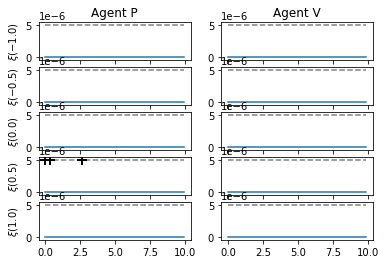

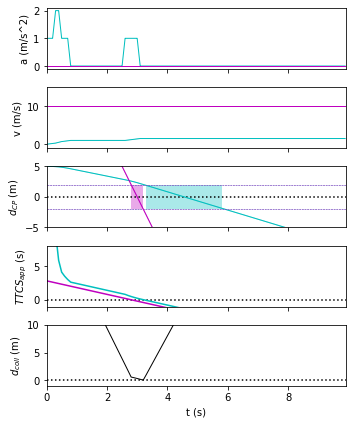


Initial car distance 50 m:


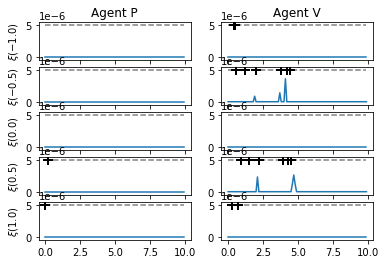

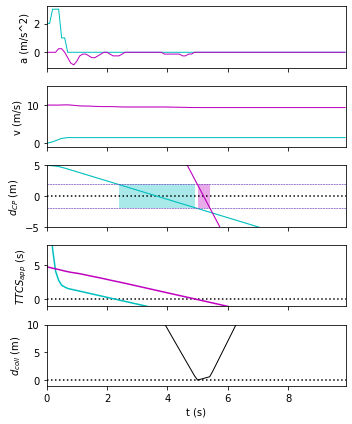


**** T_delta = 100 ****

Initial car distance 30 m:


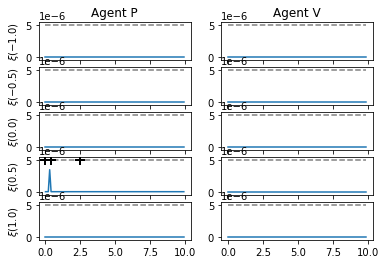

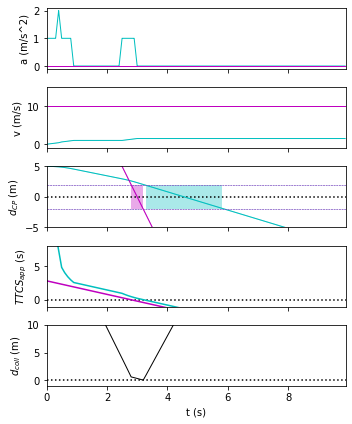


Initial car distance 50 m:


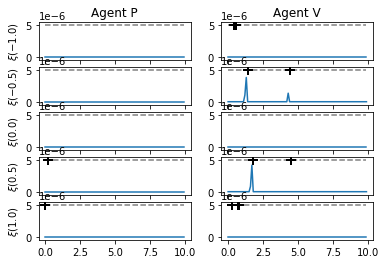

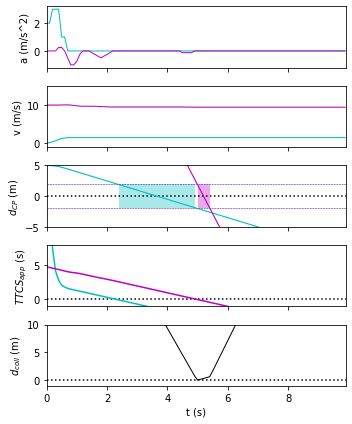



******** xi_th = 0.0001 ********

**** T_delta = 30 ****

Initial car distance 30 m:


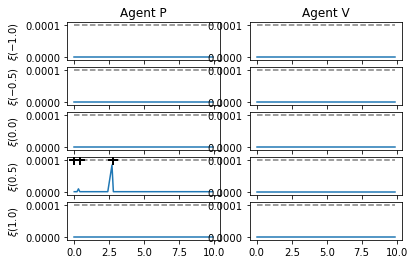

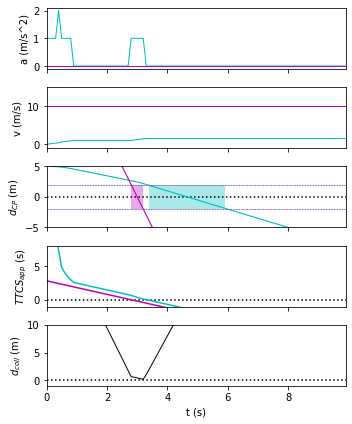


Initial car distance 50 m:


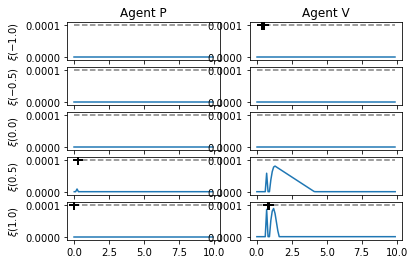

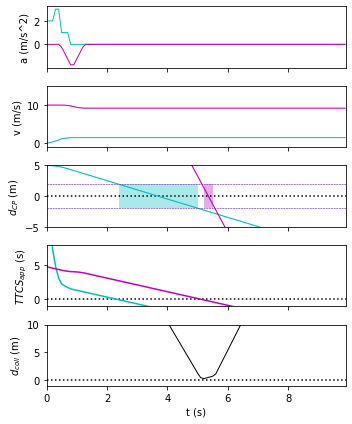


**** T_delta = 100 ****

Initial car distance 30 m:


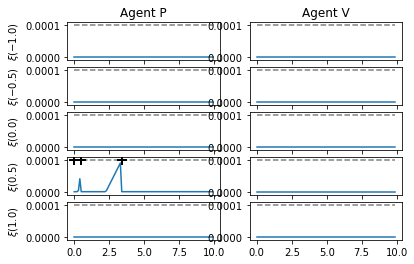

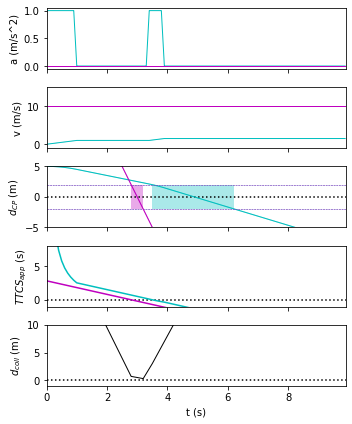


Initial car distance 50 m:


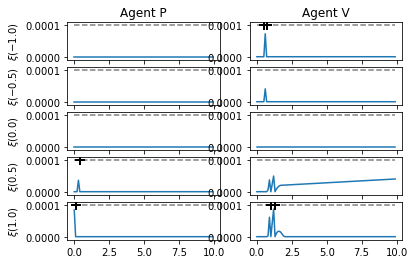

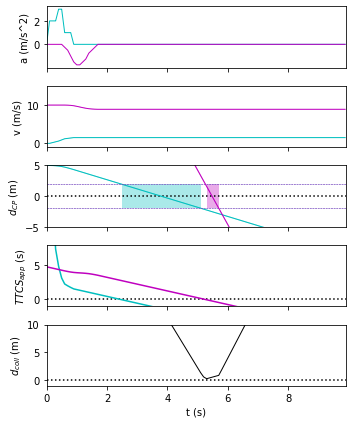



******** xi_th = 0.005 ********

**** T_delta = 30 ****

Initial car distance 30 m:


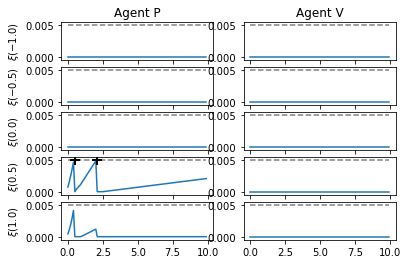

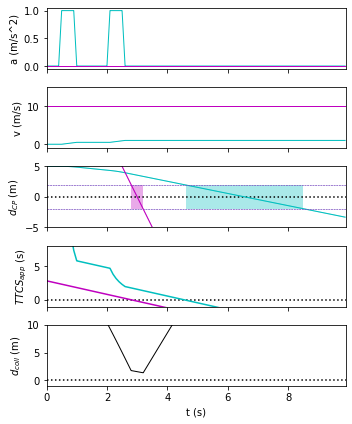


Initial car distance 50 m:


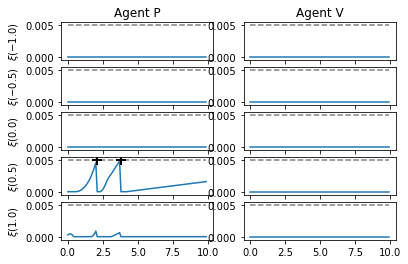

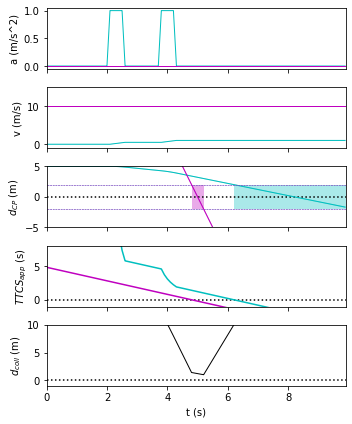


**** T_delta = 100 ****

Initial car distance 30 m:


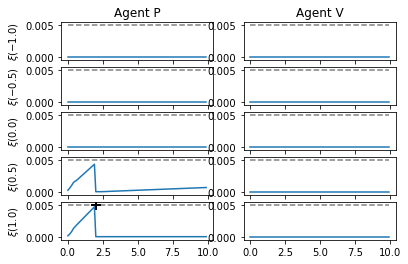

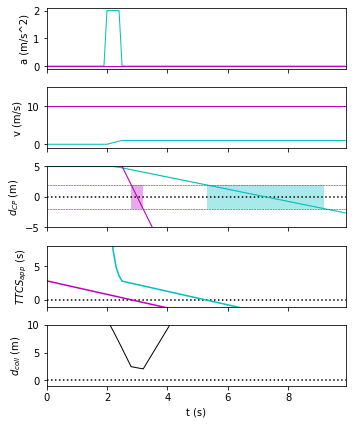


Initial car distance 50 m:


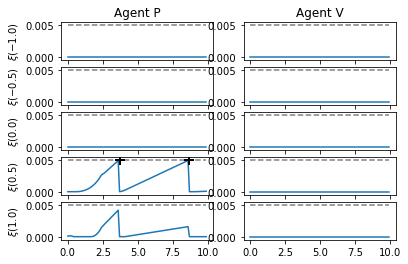

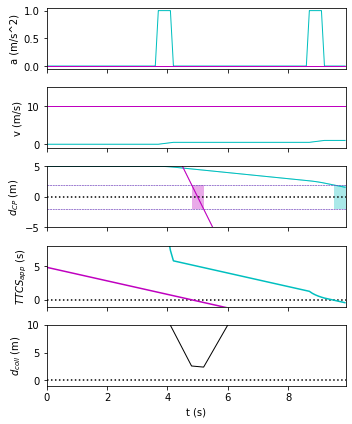

In [1]:
# append root folder of repo to PYTHONPATH (https://stackoverflow.com/questions/714063/importing-modules-from-parent-folder)
import sys
from pathlib import Path
parent_path = str(Path('.').absolute().parent)
for folder_to_add in ('', '/SCPaper'):
    path_to_add = parent_path + folder_to_add
    if not (path_to_add in sys.path):
        sys.path.append(path_to_add)
print(sys.path)

import sc_scenario

optional_assumptions = sc_scenario.get_assumptions_dict(
    default_value=False, oVA=True, oDA=True)
(params, __) = sc_scenario.get_default_params(oVA=True)
for xi_th in (5e-6, 1e-4, 5e-3):
    print(f'\n\n******** xi_th = {xi_th} ********')
    params.xi_th = xi_th
    for T_delta in (30, 100):
        print(f'\n**** T_delta = {T_delta} ****')
        params.T_delta = T_delta
        sims = sc_scenario.run_test_scenarios(dist0s = (30, 50),
                                              optional_assumptions=optional_assumptions, 
                                              params=params, plot_act_evidences=True)

## Model unit tests

Also just rerunning the `sc_scenario` unit tests. 



***** Base model, just startup *****


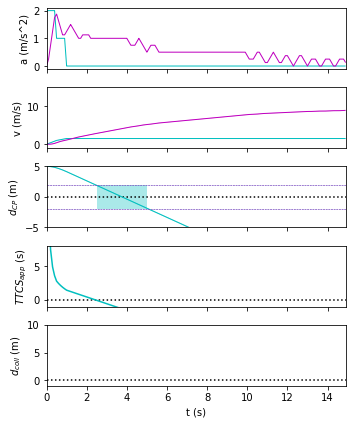



***** Base model, baseline kinematics *****

Initial car distance 30 m:


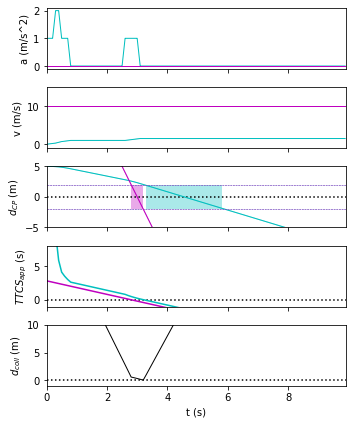


Initial car distance 40 m:


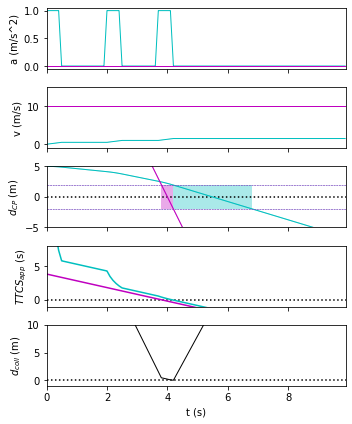


Initial car distance 50 m:


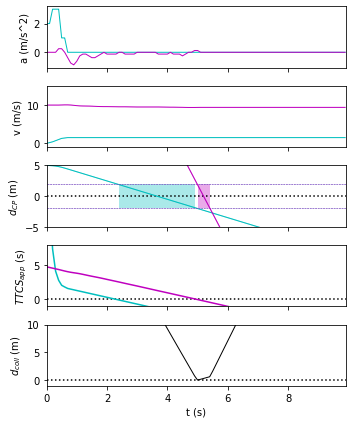



***** Enabling behaviour observation assumptions *****

Turning on oBEo:


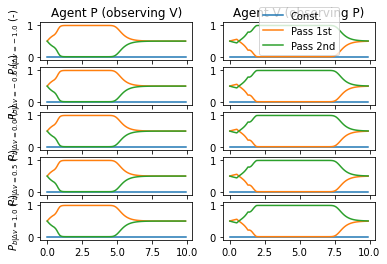

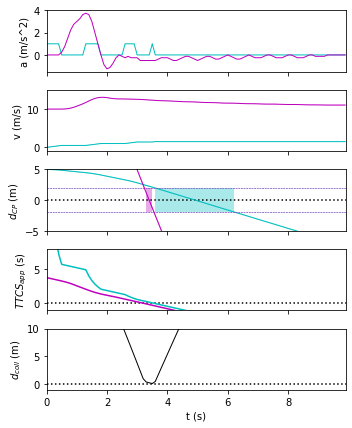


Turning on oBEv:


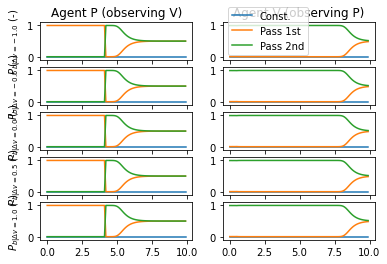

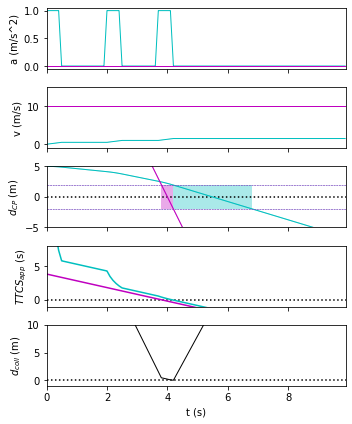


Turning on oAI:


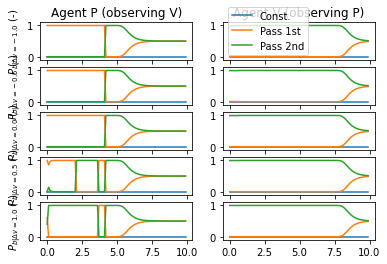

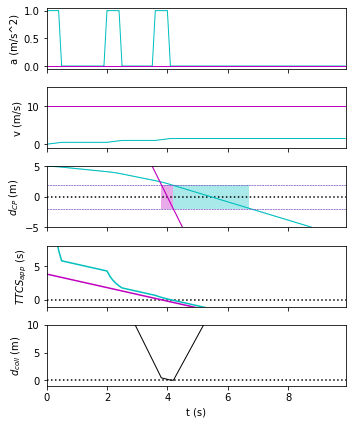



***** Enabling value accumulation *****

Initial car distance 30 m:


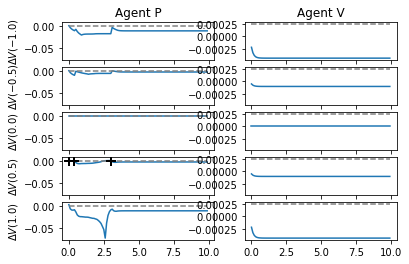

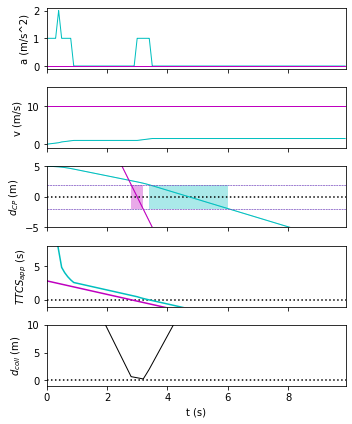


Initial car distance 50 m:


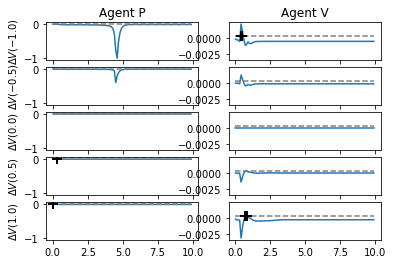

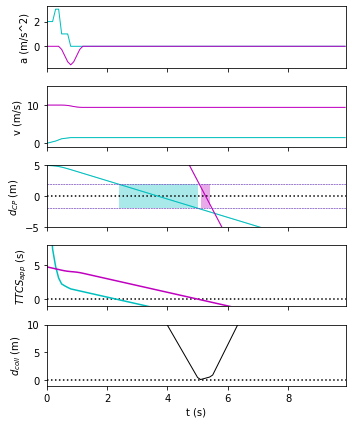



***** Enabling decision evidence accumulation *****

Initial car distance 30 m:


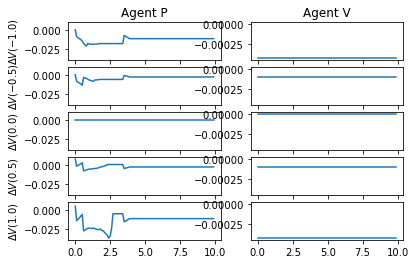

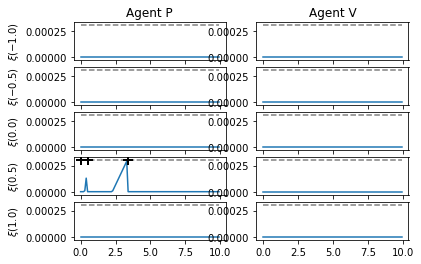

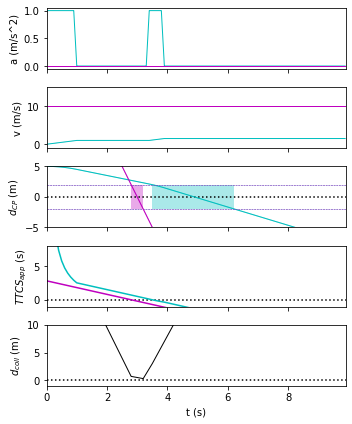


Initial car distance 50 m:


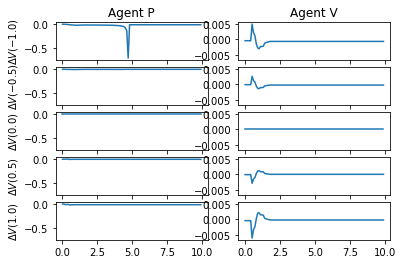

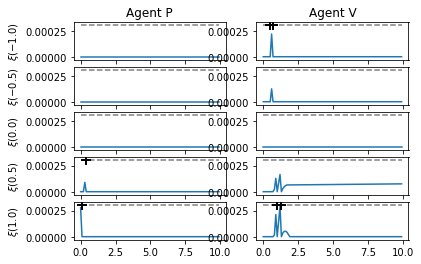

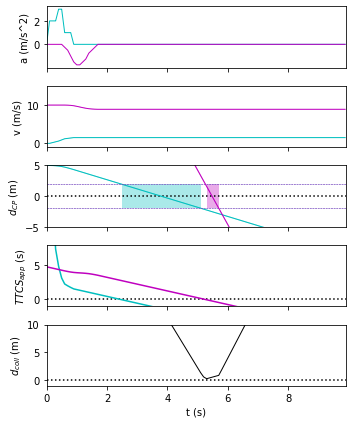

In [2]:
%run ../sc_scenario.py